In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [2]:
df = pd.read_csv("Contacts_Pre_2017.csv")

In [3]:
df.head()

,START.DATE,END.DATE,CONTACT.TYPE,Contacts
0,2010-01-01,2010-01-01,Call - Input,84
1,2010-01-01,2010-01-01,Web - Input,11
2,2010-01-02,2010-01-02,Call - Input,236
3,2010-01-02,2010-01-02,Web - Input,21
4,2010-01-02,2010-01-03,Call - Input,1


In [4]:
sum_df = df.groupby(['CONTACT.TYPE'],as_index=False).mean()

In [5]:
sum_df.head()

,CONTACT.TYPE,Contacts
0,Call - Input,1993.459897
1,Fax - Input,24.303426
2,Fax Acknowledgement - Input,9.896023
3,Installation Report - Input,1.228155
4,Internal Management,87.068153


In [6]:
count=0;
for i in df.index:
    if(df.iloc[i,2]=='Call - Input'):
        count+=1;
    
print count;    

3092


In [7]:
tt = df.iloc[i,2]=='Call - Input'

In [8]:
CI = df.loc[df['CONTACT.TYPE'] == 'Call - Input']
FI = df.loc[df['CONTACT.TYPE'] == 'Fax - Input']
FAI = df.loc[df['CONTACT.TYPE'] == 'Fax Acknowledgement - Input']
IR = df.loc[df['CONTACT.TYPE'] == 'Installation Report - Input']
IM = df.loc[df['CONTACT.TYPE'] == 'Internal Management']

In [9]:
fin = pd.read_csv('Contacts2017.csv')
fin.head()

,Date,CONTACT.TYPE,Contacts,ID
0,2017-01-01,Mail - Recieved,NaN,1
1,2017-01-02,Mail - Recieved,NaN,2
2,2017-01-03,Mail - Recieved,NaN,3
3,2017-01-04,Mail - Recieved,NaN,4
4,2017-01-05,Mail - Recieved,NaN,5


In [10]:
sum_fin = fin.groupby(['CONTACT.TYPE'],as_index=False).sum()
sum_fin.head()

,CONTACT.TYPE,Contacts,ID
0,Call - Input,NaN,13727
1,Fax - Input,NaN,35631
2,Fax Acknowledgement - Input,NaN,41107
3,Installation Report - Input,NaN,46583
4,Internal Management,NaN,19203


In [11]:
CI.head()

,START.DATE,END.DATE,CONTACT.TYPE,Contacts
0,2010-01-01,2010-01-01,Call - Input,84
2,2010-01-02,2010-01-02,Call - Input,236
4,2010-01-02,2010-01-03,Call - Input,1
5,2010-01-03,2010-01-03,Call - Input,182
7,2010-01-03,2010-01-04,Call - Input,1


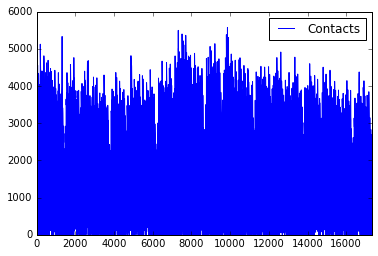

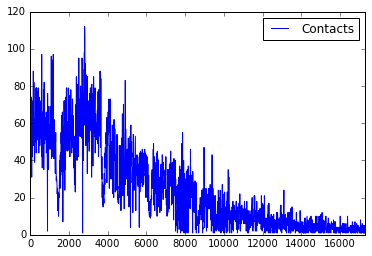

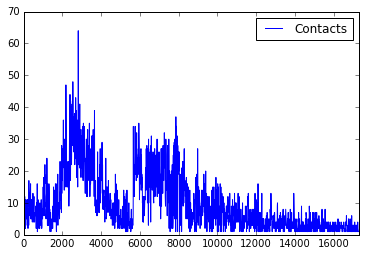

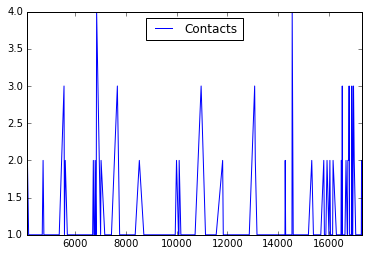

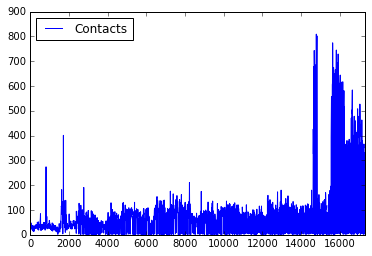

In [32]:
CI.plot()
FI.plot()
FAI.plot()
IR.plot()
IM.plot()
plt.show()

In [12]:
from sklearn.svm import SVR

In [13]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [18]:
#CI = CI.reset_index()
#CI = CI.reset_index()
#FI= FI.reset_index()

#FAI= CI.reset_index()

#IR= IR.reset_index()

IM= IM.reset_index()


In [48]:
CI.tail()

,level_0,index,START.DATE,END.DATE,CONTACT.TYPE,Contacts
3087,3087,17281,2016-12-28,2016-12-28,Call - Input,2682
3088,3088,17290,2016-12-28,2016-12-29,Call - Input,1
3089,3089,17291,2016-12-29,2016-12-29,Call - Input,2697
3090,3090,17299,2016-12-30,2016-12-30,Call - Input,2517
3091,3091,17308,2016-12-31,2016-12-31,Call - Input,231


In [50]:
X =  CI['level_0'].values
print X
y = CI['Contacts'].values

print y

[   0    1    2 ..., 3089 3090 3091]
[  84  236    1 ..., 2697 2517  231]


In [ ]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)

In [ ]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

[   0    1    2 ..., 2330 2331 2332]
[ 17  13  36 ..., 313 219   6]


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


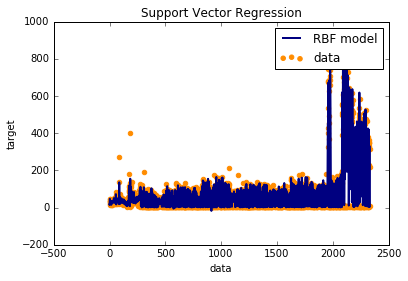

In [19]:
X =  IM['level_0'].values
print X
y = IM['Contacts'].values

print y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_rbf)

2930.52368975
